<a href="https://colab.research.google.com/github/mdSahilaman/Encryptix/blob/main/Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
dt=pd.read_csv("/content/Churn_Modelling.csv")

In [3]:
dt.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
dt.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
dt.shape

(10000, 14)

In [6]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
dt.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
dt.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
dt.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [13]:
dt=dt.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)

**Encoding categorical data**

In [15]:
dt=pd.get_dummies(dt,drop_first=True)

In [16]:
dt.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [17]:
dt["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [18]:
import seaborn as sns

<Axes: xlabel='Exited', ylabel='count'>

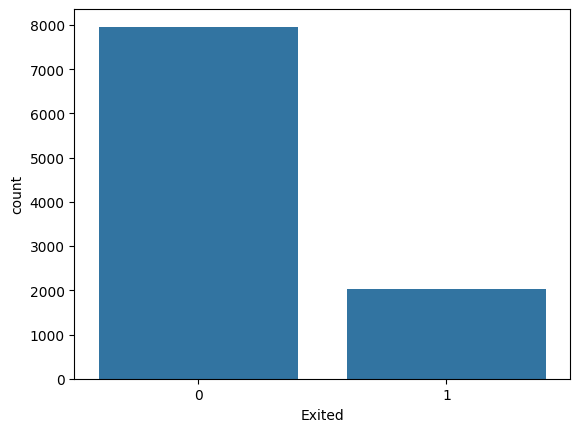

In [19]:
sns.countplot(x="Exited",data=dt)

As this dataset is too imbalanced so we need to create balance
# `Handling imbalance dataset using smote method`

In [21]:
X=dt.drop("Exited",axis=1)
y=dt["Exited"]

In [20]:
from imblearn.over_sampling import SMOTE

In [22]:
New_x,New_y=SMOTE().fit_resample(X,y)

In [23]:
New_y.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test=train_test_split(New_x,New_y,test_size=0.2,random_state=42)

Feature scaling

In [26]:
from  sklearn.preprocessing import StandardScaler

In [27]:
sc=StandardScaler()

In [28]:
x_train=sc.fit_transform(x_train)

In [29]:
x_test=sc.transform(x_test)

In [30]:
x_test

array([[-1.2366762 , -1.19952371,  0.07368323, ..., -0.75878691,
        -0.63233391, -1.23562741],
       [-0.46151367,  0.00896406, -0.29271972, ...,  1.31789306,
        -0.63233391, -1.23562741],
       [ 0.3464022 , -0.99810908,  1.53929504, ..., -0.75878691,
         1.58144295, -1.23562741],
       ...,
       [ 0.10621099, -0.29315788,  0.44008618, ..., -0.75878691,
        -0.63233391, -1.23562741],
       [ 1.11064694,  1.11674451,  0.44008618, ...,  1.31789306,
        -0.63233391, -1.23562741],
       [ 0.73944235,  2.32523228, -0.29271972, ...,  1.31789306,
        -0.63233391,  0.80930545]])

In [31]:
from sklearn.linear_model import LogisticRegression

**Logistic Regression**

In [32]:
log=LogisticRegression()

In [33]:
log.fit(x_train,y_train)

LogisticRegression()

In [34]:
y_pred1=log.predict(x_test)

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
accuracy_score(y_test,y_pred1)

0.7762084118016321

In [38]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [40]:
precision_score(y_test,y_pred1)

0.7651515151515151

In [41]:
recall_score(y_test,y_pred1)

0.7804249839021249

**Using SVC**

In [42]:
from sklearn import svm

In [44]:
sv=svm.SVC()

In [46]:
sv.fit(x_train,y_train)

SVC()

In [47]:
y_pred2=sv.predict(x_test)

In [48]:
accuracy_score(y_test,y_pred2)

0.8405524168236033

In [49]:
precision_score(y_test,y_pred2)

0.842174197773412

**Using kneighbors classifier**

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
knn=KNeighborsClassifier()

In [52]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [55]:
y_pred3=knn.predict(x_test)

In [56]:
accuracy_score(y_test,y_pred3)

0.822661644695543

In [57]:
precision_score(y_test,y_pred3)

0.8083645443196005

**using decision tree classifier**

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
dc=DecisionTreeClassifier()

In [60]:
dc.fit(x_train,y_train)

DecisionTreeClassifier()

In [61]:
y_pred4=dc.predict(x_test)

In [62]:
accuracy_score(y_test,y_pred4)

0.8035153797865662

In [63]:
 precision_score(y_test,y_pred4)

0.7831398900427612

**Using Random forest classifier**

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
rf=RandomForestClassifier()

In [67]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [68]:
y_pred5=rf.predict(x_test)

In [69]:
accuracy_score(y_test,y_pred5)

0.8716258631512869

In [70]:
precision_score(y_test,y_pred5)

0.8657289002557544

In [73]:
final_data=pd.DataFrame({"Models":["Logistic Regression","SVC","KNN","Decision Tree","Random Forest"],"ACC":[accuracy_score(y_test,y_pred1),accuracy_score(y_test,y_pred2),accuracy_score(y_test,y_pred3),accuracy_score(y_test,y_pred4),accuracy_score(y_test,y_pred5)]})

In [74]:
final_data

,Models,ACC
0,Logistic Regression,0.776208
1,SVC,0.840552
2,KNN,0.822662
3,Decision Tree,0.803515
4,Random Forest,0.871626


<Axes: xlabel='Models', ylabel='ACC'>

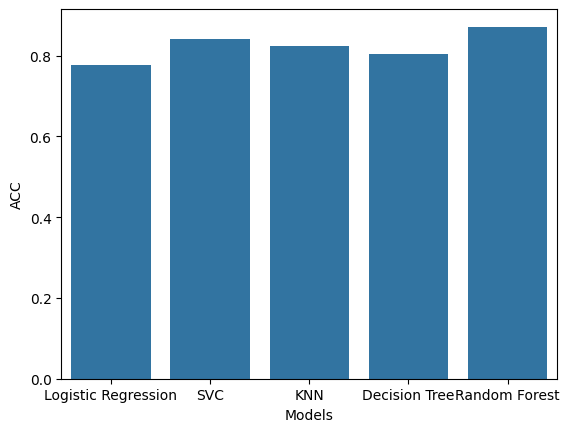

In [75]:
sns.barplot(x="Models",y="ACC",data=final_data)

**So after using 5 models we can say that random forest classifier is the best algorithm to put in production**